GOAL: The objective of this notebook is to apply exploratory analysis and regression techniques to identify which features affect housing property sales the most in New York City and come to conclusions about the dataset. I also hope to build upon and apply my Python skills in this notebook.

In [1]:
#Uploading the dataset.
from google.colab import files
uploaded=files.upload()

Saving nyc-sales.csv to nyc-sales.csv


In [2]:
#Importing basic libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Loading the data and Preliminary Exploration of the dataset

In [3]:
df=pd.read_csv('nyc-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
#To know number of rows and columns.
df.shape

(84548, 22)

84548 rows and 22 columns in our dataset.

In [5]:
#Get summary of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
#To find the number of missing values in each column.
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

#Data Cleaning and Exploratory Data Analysis

In [7]:
#drop unnecessary columns. Unmamed:0 is same an index and easement is empty.  
df.drop(['Unnamed: 0','EASE-MENT'],axis=1,inplace=True)

In [8]:
# Convert numeric to object variables
cols = ['BOROUGH','TAX CLASS AT TIME OF SALE']

for colname in cols:
    df[colname] = df[colname].astype('object')  

In [9]:
#getting an error where I cannot convert the object types into integers using astype function
#convert object type to integer using pd.to_numeric & set errors to 'coerce'; ie. changes to NaN

df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         84548 non-null  object 
 1   NEIGHBORHOOD                    84548 non-null  object 
 2   BUILDING CLASS CATEGORY         84548 non-null  object 
 3   TAX CLASS AT PRESENT            84548 non-null  object 
 4   BLOCK                           84548 non-null  int64  
 5   LOT                             84548 non-null  int64  
 6   BUILDING CLASS AT PRESENT       84548 non-null  object 
 7   ADDRESS                         84548 non-null  object 
 8   APARTMENT NUMBER                84548 non-null  object 
 9   ZIP CODE                        84548 non-null  int64  
 10  RESIDENTIAL UNITS               84548 non-null  int64  
 11  COMMERCIAL UNITS                84548 non-null  int64  
 12  TOTAL UNITS                     

In [10]:
df.drop(['SALE DATE'],axis=1,inplace=True)

In [11]:
#drop all the null values.
df=df.dropna()

In [12]:
df.shape

(69987, 19)

Text(0.5, 1.0, 'Boxplot of SALE PRICE in $')

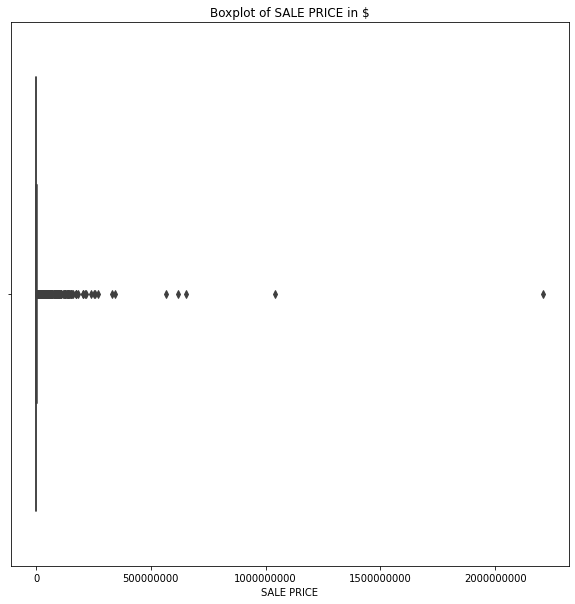

In [13]:
#Box plot to see if there are outliers in the sale price.
plt.figure(figsize=(10,10))
sns.boxplot(x='SALE PRICE',data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in $')

There are outliers in the sale price column. So, removing observations that fall outside the following range.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


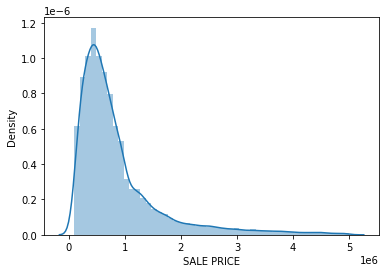

In [14]:
#Distplot to see the distribution of the sale price column.
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]
sns.distplot(df['SALE PRICE'])

SALE PRICE is highly right skewed.

In [15]:
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

In [16]:
#Get the columns with more than 0.00 missing values.
missing=df.isnull().sum()/len(df)
missing=missing[missing>0]
missing

LAND SQUARE FEET     0.356496
GROSS SQUARE FEET    0.363942
dtype: float64

Text(0.5, 1.0, 'Boxplot of Land Square Feet')

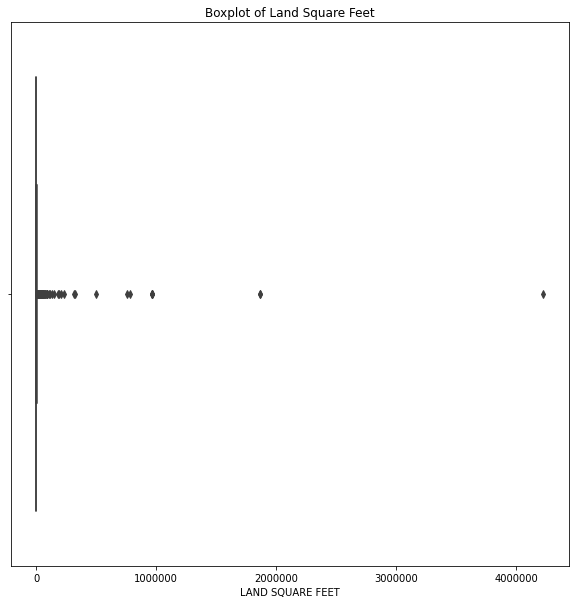

In [17]:
plt.figure(figsize=(10,10))
sns.boxplot(x='LAND SQUARE FEET',data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Land Square Feet')

Text(0.5, 1.0, 'Boxplot of Gross Square Feet')

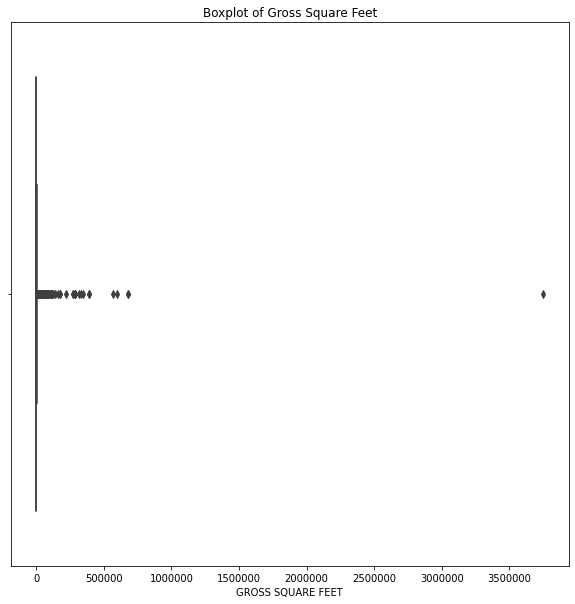

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(x='GROSS SQUARE FEET',data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Gross Square Feet')

Both Land square feet and Gross square feet columns contain certain outliers 
and also there is a case of missing data. So, filling the missing values with the median of the respective column.

---


Choosing median over mean when we have outliers in data is a better option because median is not affected by the outliers whereas mean is.

In [19]:
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].median())
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].median())

In [20]:
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,54657.000000,54657.000000,54657.000000,54657.000000,54657.000000,54657.000000,5.465700e+04,5.465700e+04,54657.000000,5.465700e+04
mean,4248.718444,382.802166,10746.513457,1.245147,0.100518,1.352087,2.690936e+03,1.897339e+03,1818.991181,8.670342e+05
std,3577.139873,665.896265,1172.158157,9.164952,9.711147,13.411547,2.369798e+04,1.780505e+04,491.023203,7.755050e+05
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.003350e+05
25%,1334.000000,21.000000,10304.000000,0.000000,0.000000,0.000000,2.000000e+03,1.290000e+03,1920.000000,3.971170e+05
50%,3311.000000,50.000000,11208.000000,1.000000,0.000000,1.000000,2.200000e+03,1.520000e+03,1940.000000,6.300000e+05
75%,6257.000000,1002.000000,11358.000000,1.000000,0.000000,2.000000,2.500000e+03,1.800000e+03,1965.000000,9.950000e+05
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.996841e+06


In [21]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
dtype: int64

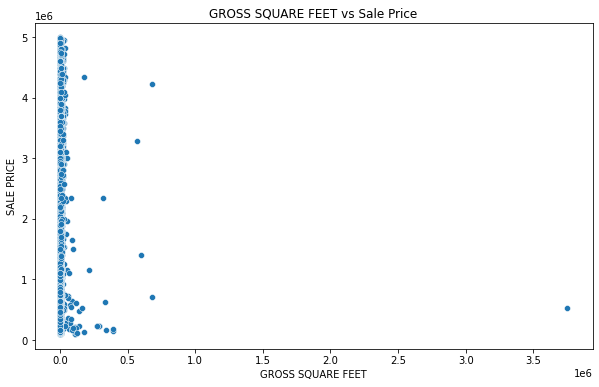

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df)
plt.title('GROSS SQUARE FEET vs Sale Price')
plt.show()

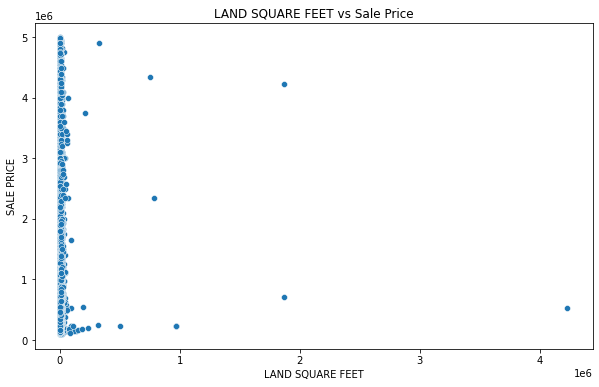

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df)
plt.title('LAND SQUARE FEET vs Sale Price')
plt.show()

From the 2 scatter plots of Gross and Land square feet vs sales price we remark that data contains outliers. 
So, we are setting an upper limit to the data to exclude the outliers.

In [24]:
df = df[df['GROSS SQUARE FEET'] < 20000]
df = df[df['LAND SQUARE FEET'] < 20000]

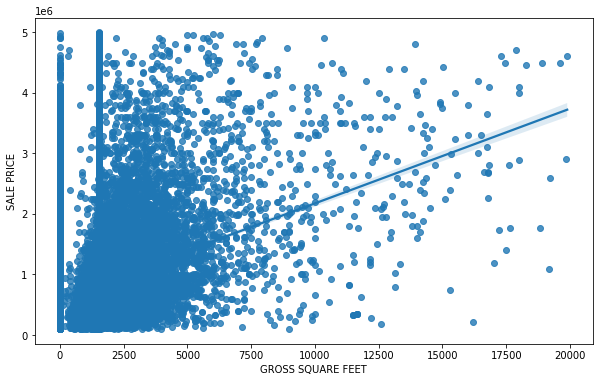

In [25]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df)

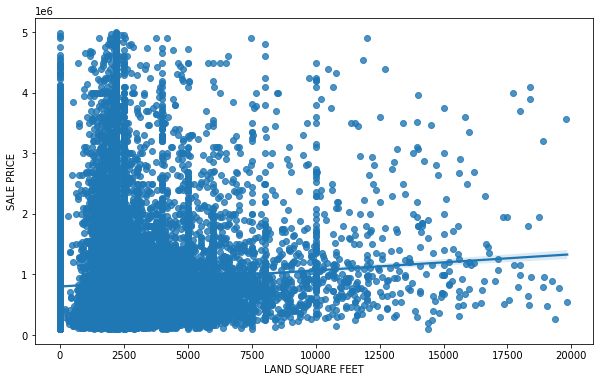

In [26]:
plt.figure(figsize=(10,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df)

In [27]:
df[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)

,TOTAL UNITS,SALE PRICE
1,1,24878
0,0,15540
2,2,9575
3,3,2736
4,4,705
6,6,368
5,5,177
8,8,136
7,7,76
10,10,58


In [28]:
#Removing rows with TOTAL UNITS == 0 and one outlier with 2261 units 
df=df[(df['TOTAL UNITS']>0) & (df['TOTAL UNITS']!=2261)]

In [29]:
df.shape

(38910, 19)

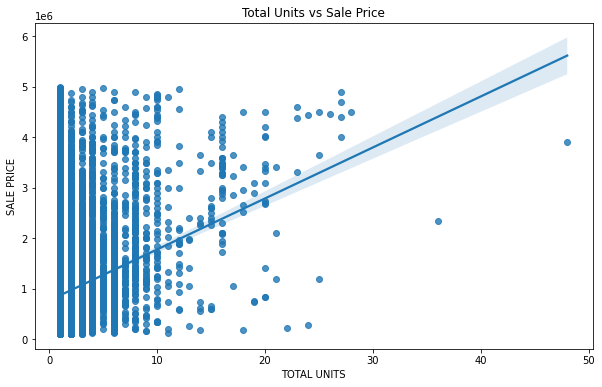

In [30]:
plt.figure(figsize=(10,6))
sns.regplot(x='TOTAL UNITS', y='SALE PRICE', data=df)
plt.title('Total Units vs Sale Price')
plt.show()

With increase in total units, the sale price is also increasing.

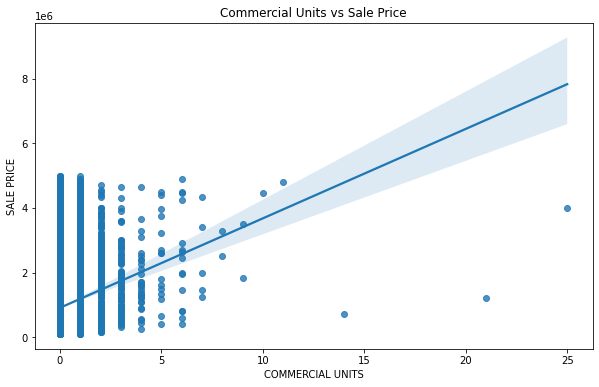

In [31]:
plt.figure(figsize=(10,6))
sns.regplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=df)
plt.title('Commercial Units vs Sale Price')
plt.show()

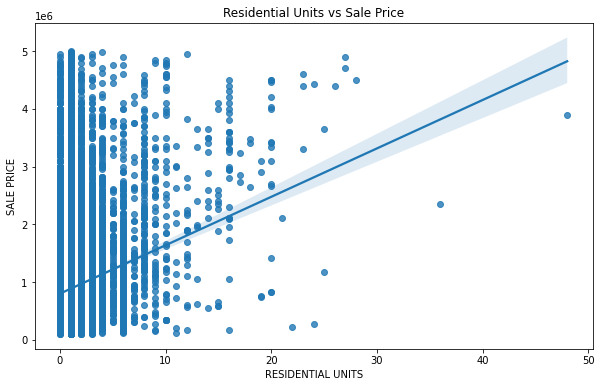

In [32]:
plt.figure(figsize=(10,6))
sns.regplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=df)
plt.title('Residential Units vs Sale Price')
plt.show()

With increase in Commercial and Residential units, the sale prie increases.



---



---



Properties in New York City are divided into four classes, each valued and 
assessed differently under the law. 
* Tax Class 1: one- to three-unit residential properties.
* Tax Class 2: All other property that is not in Class 1 and is primarily residential (rentals, cooperatives and condominiums).
* Tax Class 3: Most utility property.
* Tax Class 4: All commercial and industrial properties, such as office, retail, factory buildings and all other properties not included in tax classes 1, 2 or 3.



  

Text(0.5, 1.0, 'Average Property Price Vs Tax Class at present')

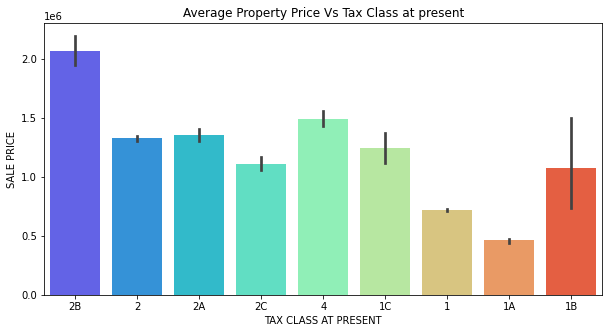

In [33]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'TAX CLASS AT PRESENT', y = 'SALE PRICE', data=df,palette = "rainbow")
ax.set_xlabel('TAX CLASS AT PRESENT')
ax.set_ylabel('SALE PRICE')
plt.title('Average Property Price Vs Tax Class at present')

Tax class 2B has the highest sale price at present.

Text(0.5, 1.0, 'Average Property Price Vs Tax Class at Time of Sale ')

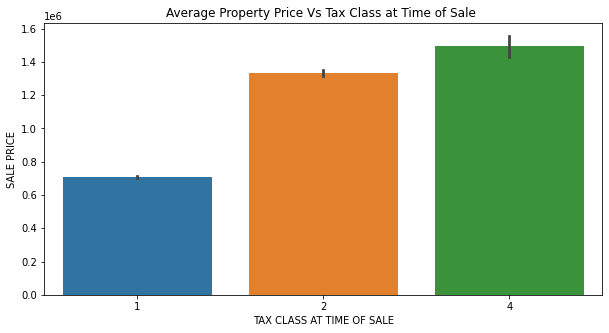

In [34]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'TAX CLASS AT TIME OF SALE', y = 'SALE PRICE', data=df)
ax.set_xlabel('TAX CLASS AT TIME OF SALE')
ax.set_ylabel('SALE PRICE')
plt.title('Average Property Price Vs Tax Class at Time of Sale ')

Tax class 4 has highest sale price at time of sale

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sales per TAX CLASS AT TIME OF SALE')

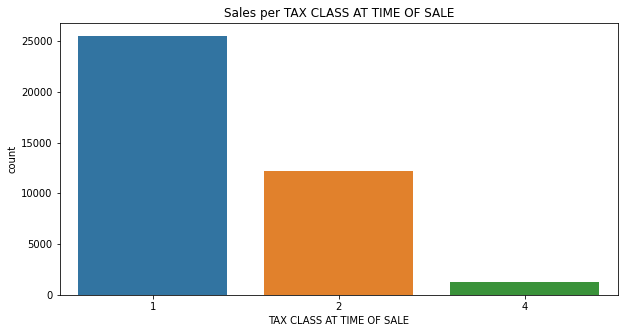

In [35]:
plt.figure(figsize=(10,5))
sns.countplot('TAX CLASS AT TIME OF SALE',data=df)
plt.title('Sales per TAX CLASS AT TIME OF SALE')

Conclusion: Tax Class 1 has maximum number of sales. People tend to buy houses with the less tax

In [36]:
df["BUILDING CLASS AT TIME OF SALE"].nunique()

109

In [37]:
df["BUILDING CLASS AT PRESENT"].nunique()

108

BOROUGH: A digit code for the borough where the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

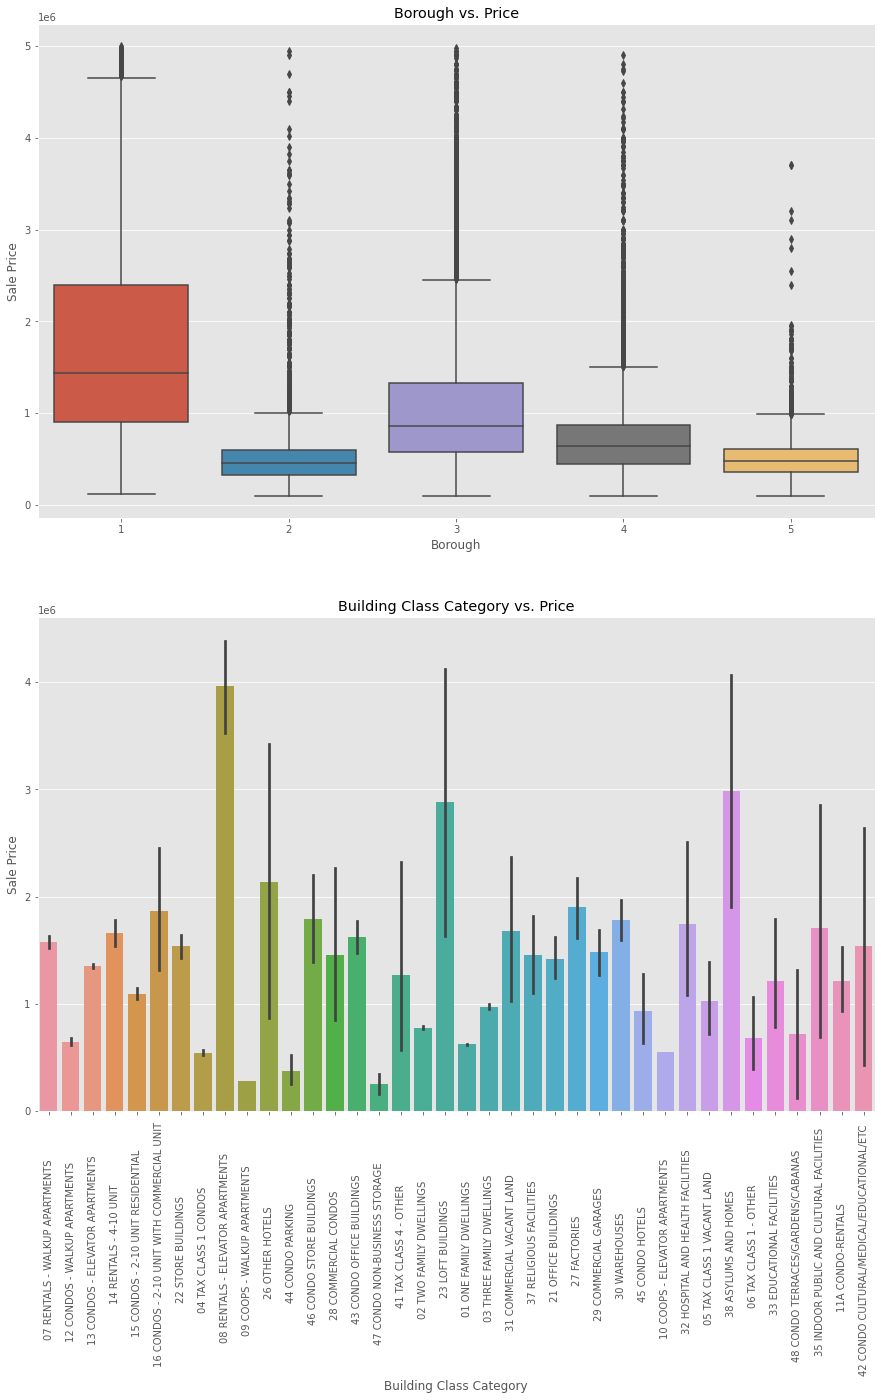

In [38]:
#Subplots of categorical features v price
plt.style.use('ggplot')
fig, axes = plt.subplots(2,1, figsize = (15,20))

#plot of borough category vs price
plt.subplot(2,1,1)
sns.boxplot(x = 'BOROUGH', y = 'SALE PRICE', data = df)
plt.xlabel('Borough')
plt.ylabel('Sale Price')
plt.title('Borough vs. Price')

#plot of building class categories vs price
plt.subplot(2,1,2)
sns.barplot(x = 'BUILDING CLASS CATEGORY', y = 'SALE PRICE', data = df)
plt.xlabel('Building Class Category')
plt.ylabel('Sale Price')
plt.title('Building Class Category vs. Price')
plt.xticks(rotation=90)

*  All boroughs(with the exception of Manhattan) consist of properties with a similar price. Manhattan has the most expensive sale prices with a median sale price at about 1.5 million. Brookly comes in second with a median price at about 850k, Queens in third with median price at about 750k and Bronx and Staten Island have median prices around 500k.


---



---


* Top 3 expensive Building Class Category are:


1.   08 Rental - Elevator Apartments.
2.   38 Asylums and Homes.
3.   23 Loft Buildings.







/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sales per Borough')

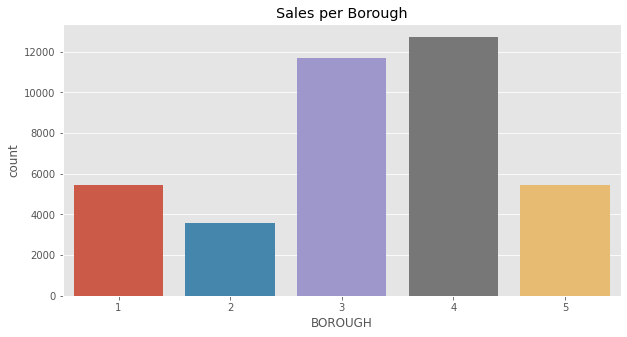

In [39]:
plt.subplots(figsize=(10,5))
sns.countplot('BOROUGH',data=df)
plt.title('Sales per Borough')

Queens has maximum number of sales followed by Brooklyn.

In [40]:
#create new list called 'neighborhood' with top 20 most expensive average sale prices
from collections import Counter
neighborhood = list(dict(Counter(df['NEIGHBORHOOD']).most_common(20)).keys())

avg_sale_prices = []
for i in neighborhood:
    avg_price = np.mean(df['SALE PRICE'][df['NEIGHBORHOOD'] == i])
    avg_sale_prices.append(avg_price)

Text(0.5, 1.0, 'Average Property Price in the Top 20 Neighborhoods')

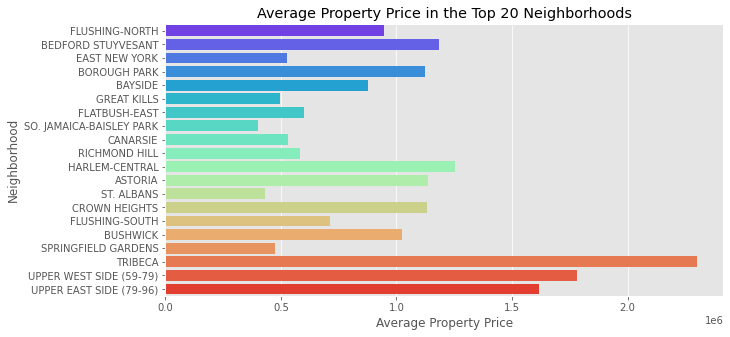

In [41]:
#plot most expensive neighborhoods with highest average property price
plt.figure(figsize=(10,5))

ax = sns.barplot(x= avg_sale_prices, y= neighborhood , palette = "rainbow")
ax.set_xlabel('Average Property Price')
ax.set_ylabel('Neighborhood')
plt.title('Average Property Price in the Top 20 Neighborhoods')

Tribeca followed by Upper West side and Upper East side have the maximum average property price.

In [42]:
df['APARTMENT NUMBER'].describe()

count     38910
unique     2643
top            
freq      26926
Name: APARTMENT NUMBER, dtype: object

In [43]:
df['ADDRESS'].describe()

count                  38910
unique                 30902
top       131-05 40TH   ROAD
freq                     209
Name: ADDRESS, dtype: object

In [44]:
df = df.drop(['APARTMENT NUMBER','ADDRESS'],axis=1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38910 entries, 3 to 84545
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         38910 non-null  object 
 1   NEIGHBORHOOD                    38910 non-null  object 
 2   BUILDING CLASS CATEGORY         38910 non-null  object 
 3   TAX CLASS AT PRESENT            38910 non-null  object 
 4   BLOCK                           38910 non-null  int64  
 5   LOT                             38910 non-null  int64  
 6   BUILDING CLASS AT PRESENT       38910 non-null  object 
 7   ZIP CODE                        38910 non-null  int64  
 8   RESIDENTIAL UNITS               38910 non-null  int64  
 9   COMMERCIAL UNITS                38910 non-null  int64  
 10  TOTAL UNITS                     38910 non-null  int64  
 11  LAND SQUARE FEET                38910 non-null  float64
 12  GROSS SQUARE FEET               

In [46]:
#replacing blanks with nan values.
df=df.replace(' ',np.nan)

In [47]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
dtype: int64

Numerical variables

Text(0.5, 1.0, 'Variable Correlation')

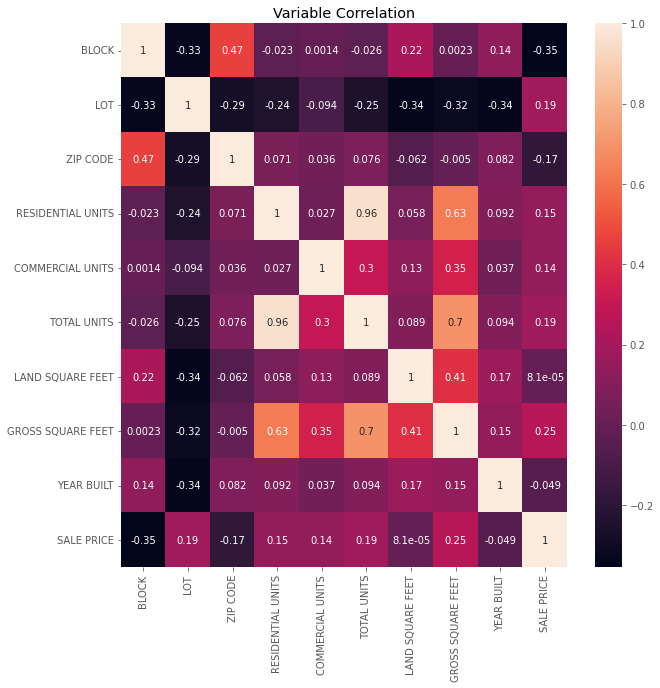

In [48]:
#correlation matrix
corrmat = df.corr()
plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, annot= True)
plt.title('Variable Correlation')

None of the variables are strongly correlated to sale price.

#Pre-Processing of Data

In [49]:
df_numerical = df[['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE']]

Scaling the data so that each column is given equal weighted and our result is more accurate.Scaling of the data makes it easy for a model to learn and understand the problem.

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_numerical)
scaled = scaler.transform(df_numerical)

for i, col in enumerate(df_numerical):
       df[col] = scaled[:,i]

In [51]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,-1.148752,-0.621192,C4,-1.440551,6.133809,-0.166945,5.830674,-0.154790,3.616025,0.174562,2,C4,3.865854
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,-1.147681,-0.605810,C4,-1.440551,4.682252,-0.166945,4.438171,-0.451520,1.759067,0.189263,2,C4,2.910129
76,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,-1.153038,0.750607,R2,-1.440551,-0.398199,-0.166945,-0.435591,-0.195718,-0.197681,-3.843080,2,R2,-0.397407
79,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,-1.156520,0.752005,R4,-1.440551,-0.398199,-0.166945,-0.435591,-0.195718,-0.197681,0.189263,2,R4,-0.213997
80,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,-1.156520,0.753403,R4,-1.440551,-0.398199,-0.166945,-0.435591,-0.195718,-0.197681,0.189263,2,R4,-0.200908


In [52]:
#Dropping few columns
del df['BUILDING CLASS AT PRESENT']
del df['BUILDING CLASS AT TIME OF SALE']
del df['NEIGHBORHOOD']

In [53]:
#Replacing the values of BOROUGH with the fraction of each category.
x=df.groupby('BOROUGH').size().values/len(df)
catego=df['BOROUGH'].unique()
for i in range(len(catego)):
    df['BOROUGH']=df['BOROUGH'].replace([catego[i]],x[i])
df['BOROUGH'].unique()

array([0.13996402, 0.0921357 , 0.30051401, 0.32698535, 0.14040093])

In [54]:
catego_feats = ['BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE']
for catego in catego_feats :
    x=df.groupby(catego).size().values/len(df)
    cat=df[catego].unique()
    for i in range(len(cat)):
        df[catego]=df[catego].replace([cat[i]],x[i])


In [55]:
df['BUILDING CLASS CATEGORY'].unique()

array([3.19249550e-01, 2.46286302e-01, 5.76972501e-02, 3.09689026e-02,
       9.25212028e-04, 2.31303007e-04, 3.40272424e-02, 2.05602673e-04,
       2.57003341e-05, 1.66024158e-02, 2.29632485e-01, 7.35029555e-03,
       2.38756104e-02, 6.42508353e-04, 3.05833976e-03, 8.78951426e-03,
       1.02801336e-04, 1.28501671e-04, 1.59342071e-03, 2.57003341e-04,
       3.23824210e-03, 2.74993575e-03, 3.08404009e-04, 1.02801336e-03,
       5.14006682e-05, 5.29426883e-03, 1.90182472e-03, 1.15651503e-03,
       1.13081470e-03])

In [56]:
df['TAX CLASS AT PRESENT'].unique()

array([0.62369571, 0.02765356, 0.00079671, 0.00331534, 0.24985865,
       0.03006939, 0.0079928 , 0.02467232, 0.03194552])

In [57]:
df['TAX CLASS AT TIME OF SALE'].unique()

array([0.65535852, 0.31261886, 0.03202262])

In [58]:
df.dtypes

BOROUGH                      float64
BUILDING CLASS CATEGORY      float64
TAX CLASS AT PRESENT         float64
BLOCK                        float64
LOT                          float64
ZIP CODE                     float64
RESIDENTIAL UNITS            float64
COMMERCIAL UNITS             float64
TOTAL UNITS                  float64
LAND SQUARE FEET             float64
GROSS SQUARE FEET            float64
YEAR BUILT                   float64
TAX CLASS AT TIME OF SALE    float64
SALE PRICE                   float64
dtype: object

#Modelling

In [59]:
X = df.drop('SALE PRICE', axis=1)
Y = df['SALE PRICE']

X.shape,Y.shape

((38910, 13), (38910,))

Train-Test Split

In [158]:
from sklearn.model_selection import train_test_split

X_train ,X_test, Y_train , Y_test = train_test_split(X , Y , test_size = 0.3 , random_state =34)

Linear Regression

Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.

Y=mx+c

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression.

In [159]:
from sklearn.linear_model import LinearRegression
# Create linear regression object
regressor = LinearRegression()
# Fit model to training data
regressor.fit(X_train,Y_train)

LinearRegression()

In [160]:
score=regressor.score(X_train,Y_train)
print("Accuracy Score:",score)

Accuracy Score: 0.3070198655006461


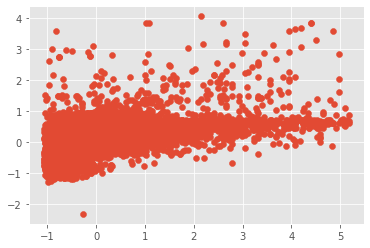

In [161]:
Y_pred = regressor.predict(X_test)
plt.scatter(Y_test,Y_pred)

**Regression Evaluation Metrics**

Here are four common evaluation metrics for regression problems:


1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors.

 
2. Mean Squared Error (MSE) is the mean of the squared errors.

 
3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

4. R^2 is the coefficient of determination which is used to evaluate the performance of a linear regression model.

Comparing these metrics:

MAE is the easiest to understand, because it's the average error.

MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

R^2 is performance of model. It ranges from 0 to 1. Higher the better.

In [162]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(Y_test, Y_pred)
MSE = metrics.mean_squared_error(Y_test,  Y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
R_2 = metrics.r2_score(Y_test, Y_pred)

In [163]:
print('Mean Absolute Error : ',MAE)
print('Mean Squred Error : ',MSE)
print('Root Mean Squared Error : ',RMSE)
print('R Square : ',R_2)

Mean Absolute Error :  0.5281000133115225
Mean Squred Error :  0.6777614781371184
Root Mean Squared Error :  0.8232627029916504
R Square :  0.3075036032629267


In [164]:
data1={'Metrics':['MAE','MSE','RMSE','R^2'],'Linear Regression' : [MAE,MSE,RMSE,R_2]}
m1=pd.DataFrame(data1,columns=['Metrics','Linear Regression'])
m1

,Metrics,Linear Regression
0,MAE,0.528100
1,MSE,0.677761
2,RMSE,0.823263
3,R^2,0.307504


Ridge Regression

The Ridge Regression is a regularization technique or in simple words it is a variation of Linear Regression. This is one of the method of regularization technique which the data suffers from multicollinearity. In this multicollinearity ,the least squares are unbiased and the variance is large and which deviates the predicted value from the actual value. In this equation also have an error term.

Y=mx+c+error term

Prediction errors are occurred due to  bias and variance in this the multicollinearity are reduced by using lamda function.

In Ridge Regression there is no feature selection and it shrinks the value but never reaches to zero. It is also called as L2 regularization technique.

In [165]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01, normalize=True)
ridge.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=0.01, normalize=True)

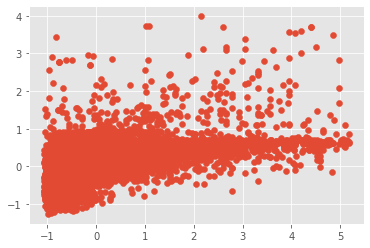

In [166]:
Y_pred_ridge = ridge.predict(X_test)
plt.scatter(Y_test,Y_pred_ridge)

In [167]:
MAE = metrics.mean_absolute_error(Y_test, Y_pred_ridge)
MSE = metrics.mean_squared_error(Y_test,  Y_pred_ridge)
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_ridge))
R_2 = metrics.r2_score(Y_test, Y_pred_ridge)

In [168]:
print('Mean Absolute Error : ',MAE)
print('Mean Squred Error : ',MSE)
print('Root Mean Squared Error : ',RMSE)
print('R Square : ',R_2)

Mean Absolute Error :  0.5289079094260533
Mean Squred Error :  0.6790357479721663
Root Mean Squared Error :  0.8240362540399337
R Square :  0.3062016300795778


In [169]:
data2={'Metrics':['MAE','MSE','RMSE','R^2'],'Ridge Regression' : [MAE,MSE,RMSE,R_2]}
m2=pd.DataFrame(data2,columns=['Metrics','Ridge Regression'])
m2

,Metrics,Ridge Regression
0,MAE,0.528908
1,MSE,0.679036
2,RMSE,0.824036
3,R^2,0.306202


K-Nearest Neighbor Regressor

KNN algorithm can be used for both classification and regression problems. The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. 

In [170]:
from sklearn.neighbors import KNeighborsRegressor
# instantiate the model and set the number of neighbors to consider to 9
reg = KNeighborsRegressor(n_neighbors=9)
# fit the model using the training data and training targets
reg.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=9)

In [171]:
n_neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(n_neighbors))
test_accuracy = np.empty(len(n_neighbors))
for i, k in enumerate(n_neighbors):
 knn = KNeighborsRegressor(k)
 knn.fit(X_train, Y_train)
 train_accuracy[i] = knn.score(X_train,Y_train)
 test_accuracy[i] = knn.score(X_test, Y_test)

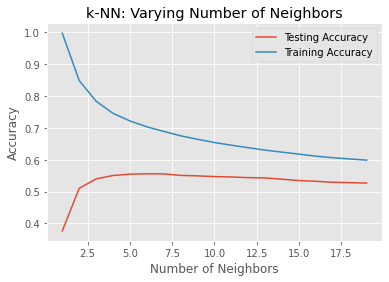

In [172]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(n_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(n_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

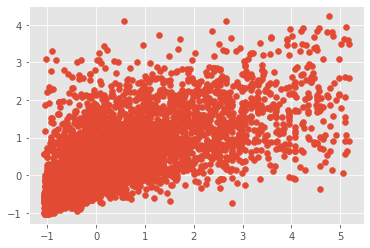

In [173]:
Y_pred_knn=reg.predict(X_test)
plt.scatter(Y_test,Y_pred_knn)

In [174]:
MAE = metrics.mean_absolute_error(Y_test, Y_pred_knn)
MSE = metrics.mean_squared_error(Y_test,  Y_pred_knn)
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_knn))
R_2 = metrics.r2_score(Y_test, Y_pred_knn)

In [175]:
print('Mean Absolute Error : ',MAE)
print('Mean Squred Error : ',MSE)
print('Root Mean Squared Error : ',RMSE)
print('R Square : ',R_2)

Mean Absolute Error :  0.38034160523612953
Mean Squred Error :  0.44114116162237194
Root Mean Squared Error :  0.6641845839993367
R Square :  0.5492681795436951


In [176]:
data3={'Metrics':['MAE','MSE','RMSE','R^2'],'KNN' : [MAE,MSE,RMSE,R_2]}
m3=pd.DataFrame(data3,columns=['Metrics','KNN'])
m3

,Metrics,KNN
0,MAE,0.380342
1,MSE,0.441141
2,RMSE,0.664185
3,R^2,0.549268


Decision Tree Regresor

One of the most popular machine learning algorithms, the decision tree regression are predictive models that calculate a target value based on a set of binary rules.

It is used to build both regression and classification models in the form of a tree structure. Datasets are broken down into smaller subsets in a decision tree, while an associated decision tree is incrementally built simultaneously.

A decision tree is used to reach an estimate based on performing a series of questions on the dataset. By asking these true/false questions, the model is able to narrow down the possible values and make a prediction. The order and content of the question are decided by the model itself.

In [177]:
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

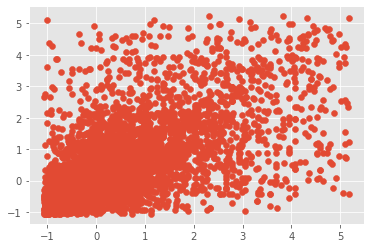

In [178]:
Y_pred_dt=regressor.predict(X_test)
plt.scatter(Y_test,Y_pred_dt)

In [179]:
MAE = metrics.mean_absolute_error(Y_test, Y_pred_dt)
MSE = metrics.mean_squared_error(Y_test,  Y_pred_dt)
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_dt))
R_2 = metrics.r2_score(Y_test, Y_pred_dt)

In [180]:
print('Mean Absolute Error : ',MAE)
print('Mean Squred Error : ',MSE)
print('Root Mean Squared Error : ',RMSE)
print('R Square : ',R_2)

Mean Absolute Error :  0.415927841182014
Mean Squred Error :  0.5604000591090958
Root Mean Squared Error :  0.7485987303683435
R Square :  0.4274165260454946


In [181]:
data4={'Metrics':['MAE','MSE','RMSE','R^2'],'Decision Tree' : [MAE,MSE,RMSE,R_2]}
m4=pd.DataFrame(data4,columns=['Metrics','Decision Tree'])
m4

,Metrics,Decision Tree
0,MAE,0.415928
1,MSE,0.560400
2,RMSE,0.748599
3,R^2,0.427417


Random Forest Regressor

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [182]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)

RandomForestRegressor()

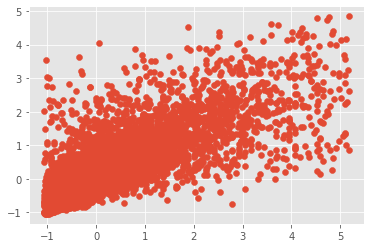

In [183]:
Y_pred_rfr = rfr.predict(X_test)
plt.scatter(Y_test,Y_pred_rfr)

In [184]:
MAE = metrics.mean_absolute_error(Y_test, Y_pred_rfr)
MSE = metrics.mean_squared_error(Y_test,  Y_pred_rfr)
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_rfr))
R_2 = metrics.r2_score(Y_test, Y_pred_rfr)

In [185]:
print('Mean Absolute Error : ',MAE)
print('Mean Squred Error : ',MSE)
print('Root Mean Squared Error : ',RMSE)
print('R Square : ',R_2)

Mean Absolute Error :  0.3258872418222255
Mean Squred Error :  0.33845183692116687
Root Mean Squared Error :  0.5817661359353661
R Square :  0.6541900283545847


In [186]:
data5={'Metrics':['MAE','MSE','RMSE','R^2'],'Random Forest' : [MAE,MSE,RMSE,R_2]}
m5=pd.DataFrame(data5,columns=['Metrics','Random Forest'])
m5

,Metrics,Random Forest
0,MAE,0.325887
1,MSE,0.338452
2,RMSE,0.581766
3,R^2,0.654190


In [193]:
df2=pd.merge(m1,m2,on='Metrics',how='outer')
df3=pd.merge(df2,m3,on='Metrics',how='outer')
df4=pd.merge(df3,m4,on='Metrics',how='outer')
df5=pd.merge(df4,m5,on='Metrics',how='outer')
df5

,Metrics,Linear Regression,Ridge Regression,KNN,Decision Tree,Random Forest
0,MAE,0.528100,0.528908,0.380342,0.415928,0.325887
1,MSE,0.677761,0.679036,0.441141,0.560400,0.338452
2,RMSE,0.823263,0.824036,0.664185,0.748599,0.581766
3,R^2,0.307504,0.306202,0.549268,0.427417,0.654190


**Random Forest has least MAE, MSE and RMSE values and the maximum R^2 value among all the other models.**

*So, Random Forest is the model which i would choose for this data*


In [196]:
df6=pd.DataFrame(Y_test)

In [197]:
df6['Actual']=Y_test

In [198]:
df6['Predict']=Y_pred_rfr

In [199]:
df6['Error']=df6['Actual']-df6['Predict']
df6.head()

,SALE PRICE,Actual,Predict,Error
26608,0.457490,0.457490,0.114323,0.343167
72028,-0.770219,-0.770219,-0.663592,-0.106627
73927,-0.628807,-0.628807,-0.826871,0.198063
80436,-0.813071,-0.813071,-0.598355,-0.214717
5234,2.469388,2.469388,3.366258,-0.896870




---



---



Inferences : 

*   With increase in the housing units, the sale price also increases.

Properties in New York City are divided into four classes, each valued and assessed differently under the law.
•	Tax Class 1: one- to three-unit residential properties.
•	Tax Class 2: All other property that is not in Class 1 and is primarily residential (rentals, cooperatives and condominiums).
•	Tax Class 3: Most utility property.
•	Tax Class 4: All commercial and industrial properties, such as office, retail, factory buildings and all other properties not included in tax classes 1, 2 or 3.
*   Tax class 2B has the highest sale price at present.


*   Tax class 4 has highest sale price at time of sale.
*   Tax Class 1 has maximum number of sales. People tend to buy houses with the less tax

BOROUGH: A digit code for the borough where the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* 	All boroughs(with the exception of Manhattan) consist of properties with a similar price. Manhattan has the most expensive sale prices with a median sale price at about 1.5 million. Brookly comes in second with a median price at about 850k, Queens in third with median price at about 750k and Bronx and Staten Island have median prices around 500k.

*   Top 3 expensive Building Class Category are:
1.	08 Rental - Elevator Apartments.
2.	38 Asylums and Homes.
3.	23 Loft Buildings.

*   Queens has maximum number of sales followed by Brooklyn.

*   Tribeca followed by Upper West side and Upper East side have the maximum average property price.

*   From the Performance Matrics, Random Forest is a better model than all the other regression models for our data.

